In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mragpavank/insurance1")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 18.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mragpavank/insurance1/versions/1


In [ ]:
!ls -R "{path}"

/root/.cache/kagglehub/datasets/mragpavank/insurance1/versions/1:
insurance.csv


In [ ]:
import pandas as pd
csv_file_path = f'{path}/insurance.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("\nDuplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Display the shape after dropping duplicates
print("\nShape after dropping duplicates:", df_cleaned.shape)


Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Shape after dropping duplicates: (1337, 7)


## Preprocessing

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region'], drop_first=True)
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


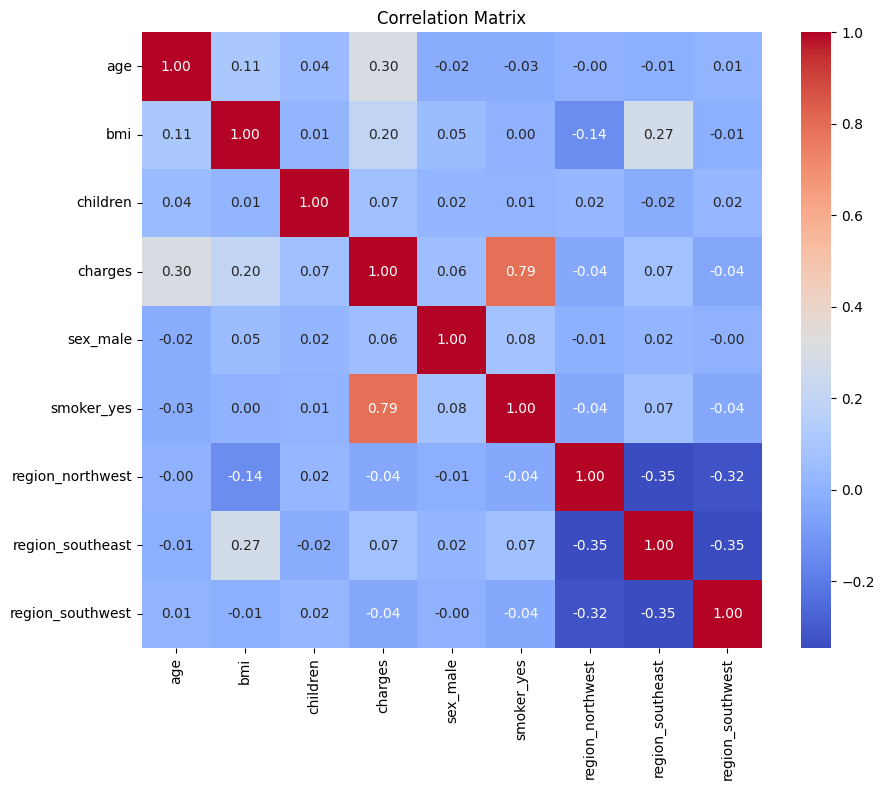

In [ ]:
correlation_matrix = df_processed.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y = df_processed[['charges']]
x = df_processed.drop("charges", axis=1)

## Splitting Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)

## Pemodelan Regresi

In [ ]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
model.score(x_test, y_test)

0.7835929767120724

In [ ]:
model.predict([[19, 26, 0, 1, 1, 0, 0, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24538.46352107]])

In [ ]:
df_processedms = df_processed.copy()
df_processedms.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
df_processedms['y'] = y
df_processedms

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,y
0,19,27.900,0,16884.92400,False,True,False,False,True,16884.92400
1,18,33.770,1,1725.55230,True,False,False,True,False,1725.55230
2,28,33.000,3,4449.46200,True,False,False,True,False,4449.46200
3,33,22.705,0,21984.47061,True,False,True,False,False,21984.47061
4,32,28.880,0,3866.85520,True,False,True,False,False,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,10600.54830
1334,18,31.920,0,2205.98080,False,False,False,False,False,2205.98080
1335,18,36.850,0,1629.83350,False,False,False,True,False,1629.83350
1336,21,25.800,0,2007.94500,False,False,False,False,True,2007.94500


In [ ]:
y_pred = model.predict(x)

In [ ]:
df_processedms['predict'] = y_pred
df_processedms.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,y,predict
0,19,27.900,0,16884.92400,False,True,False,False,True,16884.92400,25197.531061
1,18,33.770,1,1725.55230,True,False,False,True,False,1725.55230,3826.781929
2,28,33.000,3,4449.46200,True,False,False,True,False,4449.46200,6987.535290
3,33,22.705,0,21984.47061,True,False,True,False,False,21984.47061,3813.396616
4,32,28.880,0,3866.85520,True,False,True,False,False,3866.85520,5637.967419


In [ ]:
df_processedms['error'] = df_processedms['y'] - df_processedms['predict']
df_processedms.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,y,predict,error
0,19,27.900,0,16884.92400,False,True,False,False,True,16884.92400,25197.531061,-8312.607061
1,18,33.770,1,1725.55230,True,False,False,True,False,1725.55230,3826.781929,-2101.229629
2,28,33.000,3,4449.46200,True,False,False,True,False,4449.46200,6987.535290,-2538.073290
3,33,22.705,0,21984.47061,True,False,True,False,False,21984.47061,3813.396616,18171.073994
4,32,28.880,0,3866.85520,True,False,True,False,False,3866.85520,5637.967419,-1771.112219


In [ ]:
df_processedms['squared_error'] = df_processedms['error'] ** 2

In [ ]:
df_processedms['percent_error'] = np.abs((y - y_pred) / y)

In [ ]:
df_processedms['abs_error'] = np.abs(df_processedms['error'])

In [ ]:
df_processedms.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,y,predict,error,squared_error,percent_error,abs_error
0,19,27.900,0,16884.92400,False,True,False,False,True,16884.92400,25197.531061,-8312.607061,6.909944e+07,0.492309,8312.607061
1,18,33.770,1,1725.55230,True,False,False,True,False,1725.55230,3826.781929,-2101.229629,4.415166e+06,1.217714,2101.229629
2,28,33.000,3,4449.46200,True,False,False,True,False,4449.46200,6987.535290,-2538.073290,6.441816e+06,0.570423,2538.073290
3,33,22.705,0,21984.47061,True,False,True,False,False,21984.47061,3813.396616,18171.073994,3.301879e+08,0.826541,18171.073994
4,32,28.880,0,3866.85520,True,False,True,False,False,3866.85520,5637.967419,-1771.112219,3.136838e+06,0.458024,1771.112219


In [ ]:
df_result = df_processedms[['y', 'predict', 'error', 'squared_error', 'abs_error','percent_error']]
df_result.head()

,y,predict,error,squared_error,abs_error,percent_error
0,16884.92400,25197.531061,-8312.607061,6.909944e+07,8312.607061,0.492309
1,1725.55230,3826.781929,-2101.229629,4.415166e+06,2101.229629,1.217714
2,4449.46200,6987.535290,-2538.073290,6.441816e+06,2538.073290,0.570423
3,21984.47061,3813.396616,18171.073994,3.301879e+08,18171.073994,0.826541
4,3866.85520,5637.967419,-1771.112219,3.136838e+06,1771.112219,0.458024


In [ ]:
df_result.mean()

,0
y,1.327042e+04
predict,1.331434e+04
error,-4.391368e+01
squared_error,3.654043e+07
abs_error,4.202818e+03
percent_error,4.314120e-01


In [ ]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)

In [ ]:
summary = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error'],
    'Value': [mse, mae, mape]
})
summary

,Metric,Value
0,Mean Squared Error,3.654043e+07
1,Mean Absolute Error,4.202818e+03
2,Mean Absolute Percentage Error,4.314120e-01
